In [1]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lm = linear_model.LinearRegression()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor  
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statistics 
import numpy
from numpy import corrcoef
from numpy import around
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [3]:
import pandas as pd

In [4]:
# read csv and remove non used column 
df=pd.read_csv(r'C:\Users\SpirosAvgoustatos\Desktop\case study\trainingSet_randomised.csv')  
df = df.drop(df.columns[[7]], axis=1) 


In [5]:
# calculate possible usefull metrics
df["times_collect_to_redeem"]=df["sum_collect"]/df["sum_redeem"]
df["points_collect_to_redeem"]=df["sum_collect_points"]/df["sum_redeem_points"]
df["avg_yearly_collect_times"]=df["sum_collect"]/df["years_in_the_program"]
df["avg_yearly_collect_points"]=df["sum_collect_points"]/df["years_in_the_program"]
df["avg_yearly_redeem_times"]=df["sum_redeem"]/df["years_in_the_program"]
df["avg_yearly_redeem_points"]=df["sum_redeem_points"]/df["years_in_the_program"]
df["months_in_program"]=df["years_in_the_program"]*12
df["relevance"]=df["months_since_last_transaction"]/df["months_in_program"]

In [6]:
df

,state,sum_collect,sum_redeem,sum_collect_points,sum_redeem_points,years_in_the_program,months_since_last_transaction,times_collect_to_redeem,points_collect_to_redeem,avg_yearly_collect_times,avg_yearly_collect_points,avg_yearly_redeem_times,avg_yearly_redeem_points,months_in_program,relevance
0,0,16,3,2028,495.0,24,7,5.333333,4.096970,0.666667,84.500000,0.125000,20.625000,288,0.024306
1,1,9,3,3649,495.0,15,16,3.000000,7.371717,0.600000,243.266667,0.200000,33.000000,180,0.088889
2,1,5,3,1181,495.0,12,15,1.666667,2.385859,0.416667,98.416667,0.250000,41.250000,144,0.104167
3,0,10,4,3449,14995.0,21,7,2.500000,0.230010,0.476190,164.238095,0.190476,714.047619,252,0.027778
4,1,10,3,970,495.0,7,9,3.333333,1.959596,1.428571,138.571429,0.428571,70.714286,84,0.107143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,21,3,34442,495.0,10,9,7.000000,69.579798,2.100000,3444.200000,0.300000,49.500000,120,0.075000
4996,1,4,3,1349,495.0,13,7,1.333333,2.725253,0.307692,103.769231,0.230769,38.076923,156,0.044872
4997,1,6,3,799,495.0,10,7,2.000000,1.614141,0.600000,79.900000,0.300000,49.500000,120,0.058333
4998,0,22,7,39823,131595.0,11,7,3.142857,0.302618,2.000000,3620.272727,0.636364,11963.181818,132,0.053030


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


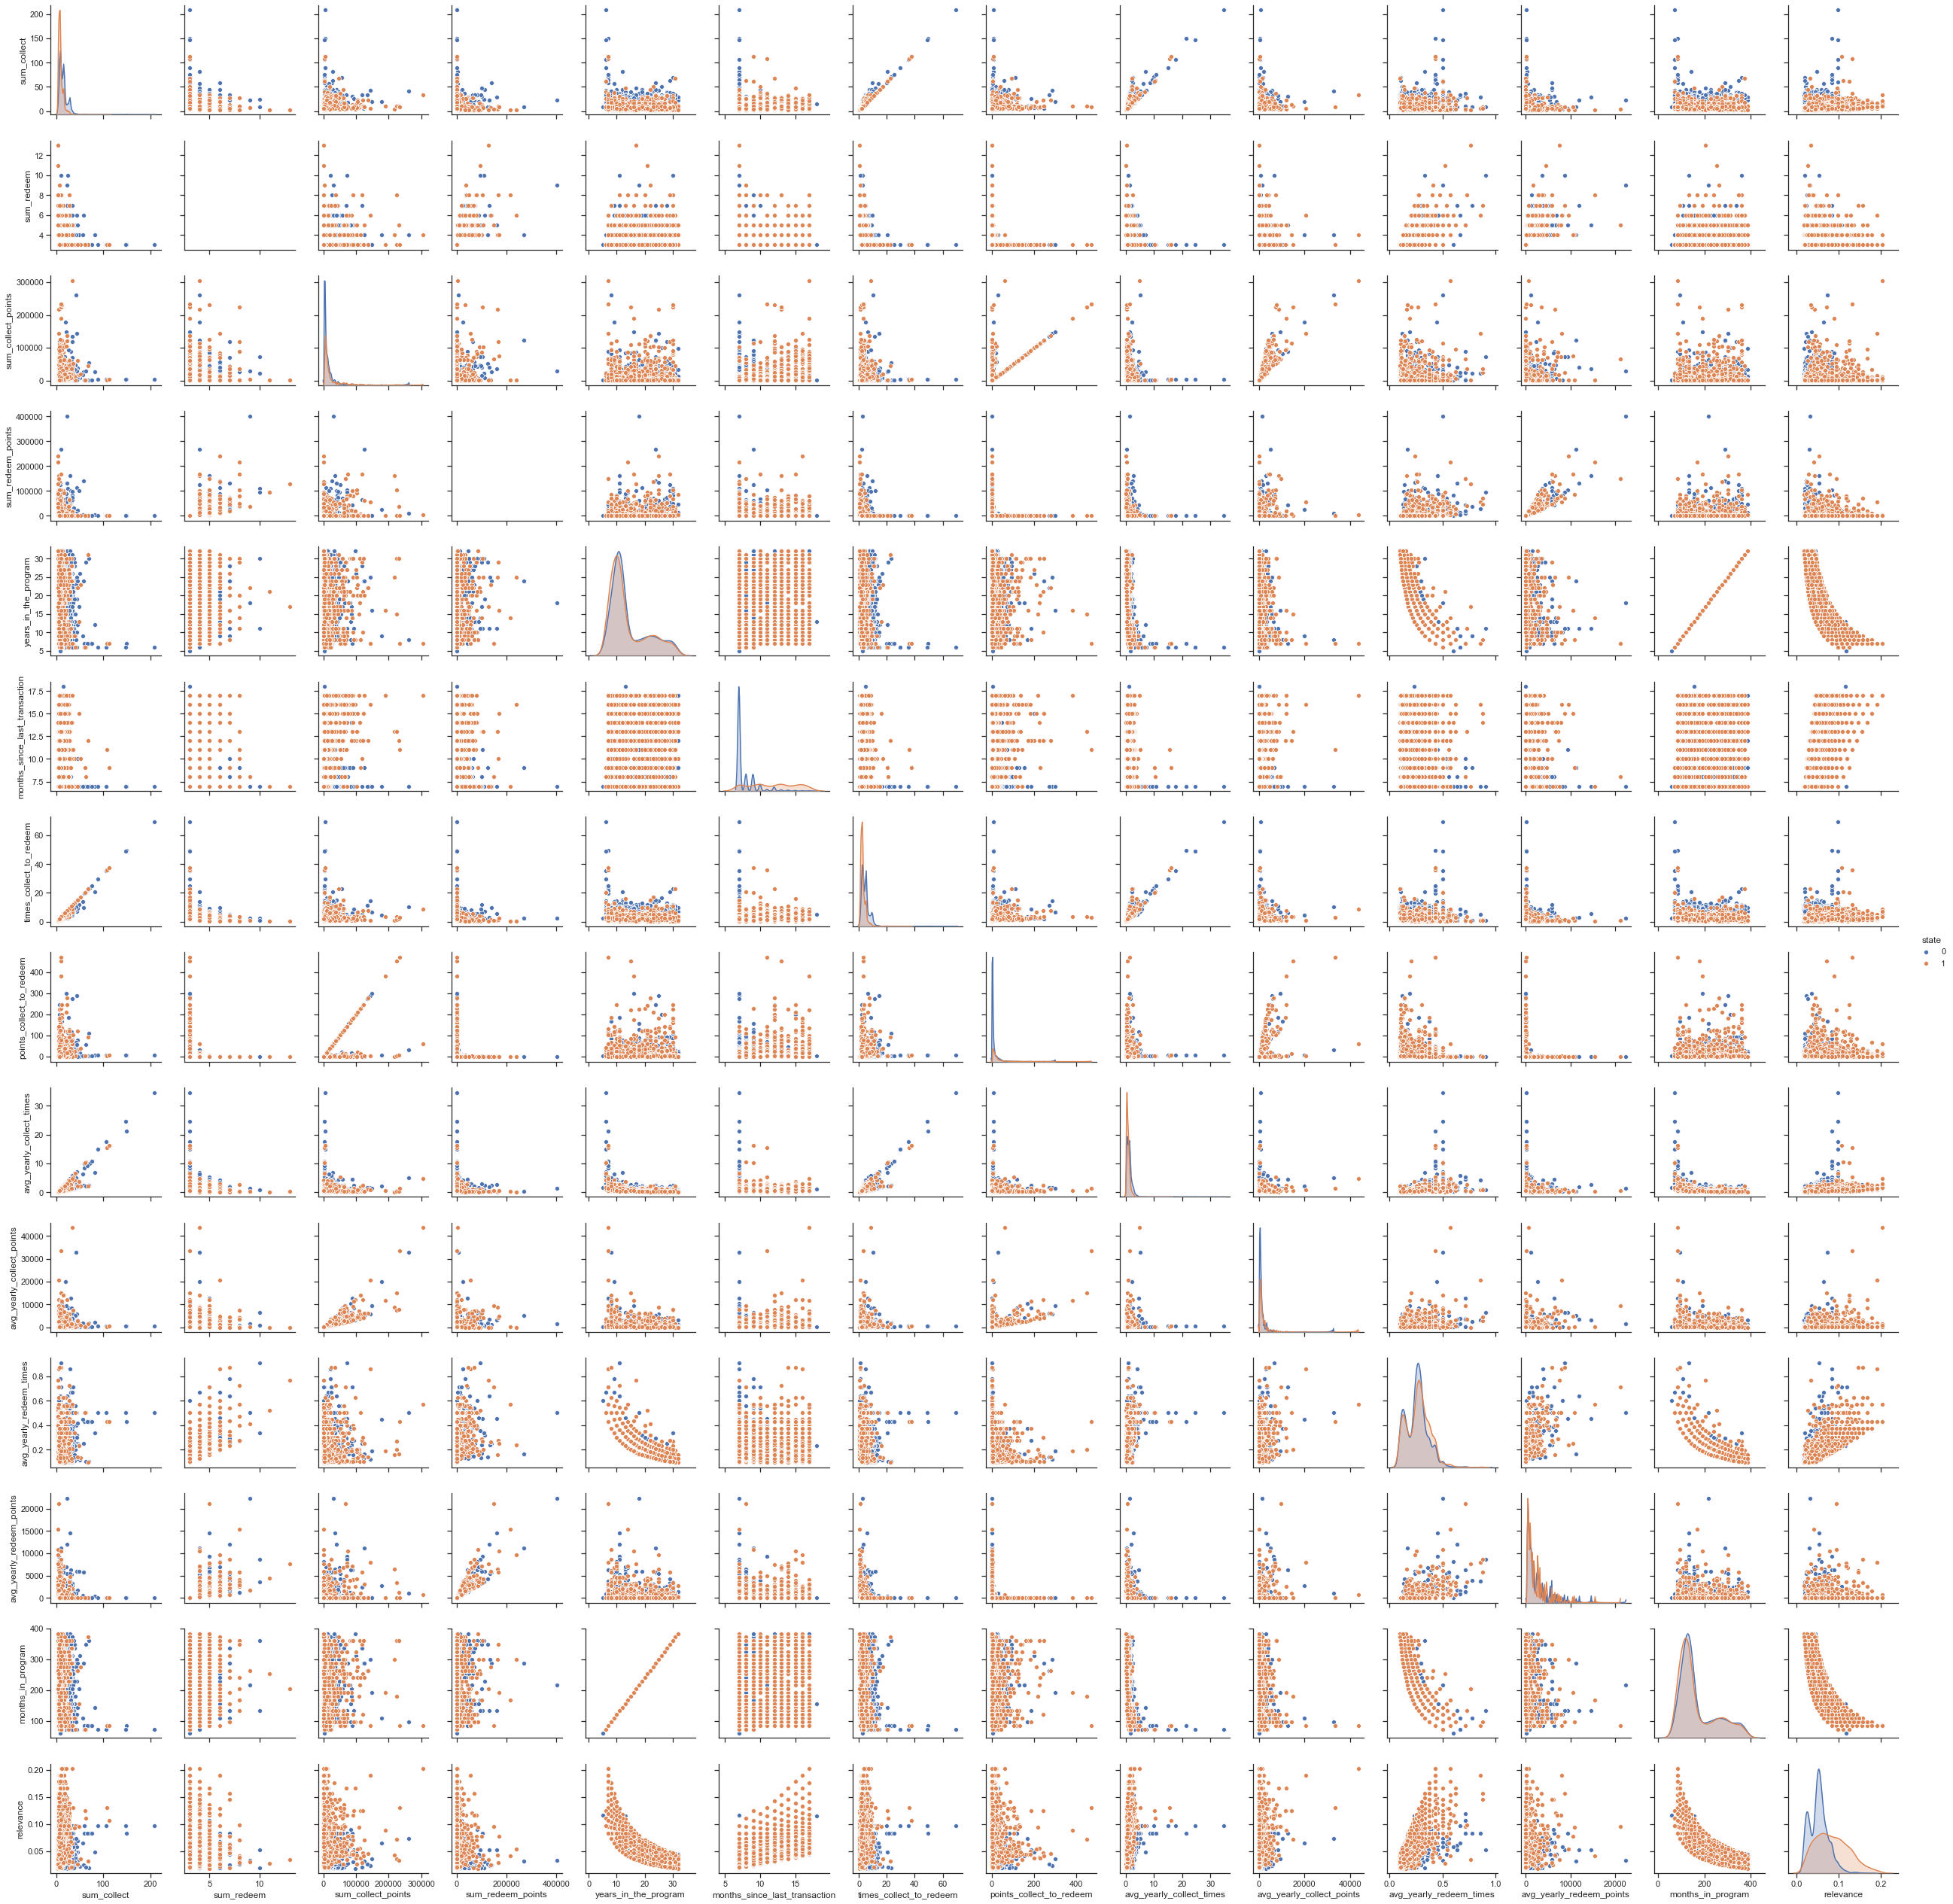

In [7]:
sns.set(style="ticks")
sns.pairplot(df, hue="state")

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,state,sum_collect,sum_redeem,sum_collect_points,sum_redeem_points,years_in_the_program,months_since_last_transaction,times_collect_to_redeem,points_collect_to_redeem,avg_yearly_collect_times,avg_yearly_collect_points,avg_yearly_redeem_times,avg_yearly_redeem_points,months_in_program,relevance
state,1.00,-0.32,0.01,0.01,0.00,-0.04,0.63,-0.31,0.02,-0.20,0.01,0.06,0.01,-0.04,0.45
sum_collect,-0.32,1.00,0.04,0.14,0.02,-0.07,-0.28,0.98,0.13,0.86,0.14,0.09,0.02,-0.07,-0.12
sum_redeem,0.01,0.04,1.00,0.28,0.71,0.16,0.01,-0.12,-0.10,-0.03,0.21,0.24,0.67,0.16,-0.11
sum_collect_points,0.01,0.14,0.28,1.00,0.31,0.15,0.08,0.08,0.68,0.04,0.87,-0.01,0.29,0.15,-0.06
sum_redeem_points,0.00,0.02,0.71,0.31,1.00,0.12,0.00,-0.09,-0.07,-0.04,0.22,0.15,0.91,0.12,-0.09
years_in_the_program,-0.04,-0.07,0.16,0.15,0.12,1.00,-0.00,-0.10,0.13,-0.36,-0.04,-0.84,0.02,1.00,-0.68
months_since_last_transaction,0.63,-0.28,0.01,0.08,0.00,-0.00,1.00,-0.27,0.08,-0.19,0.06,0.00,0.00,-0.00,0.64
times_collect_to_redeem,-0.31,0.98,-0.12,0.08,-0.09,-0.10,-0.27,1.00,0.15,0.87,0.09,0.06,-0.08,-0.10,-0.10
points_collect_to_redeem,0.02,0.13,-0.10,0.68,-0.07,0.13,0.08,0.15,1.00,0.03,0.56,-0.15,-0.07,0.13,-0.06
avg_yearly_collect_times,-0.20,0.86,-0.03,0.04,-0.04,-0.36,-0.19,0.87,0.03,1.00,0.12,0.39,-0.00,-0.36,0.16


In [9]:
X, y =  df.drop("state", axis=1) , df["state"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2,random_state=1)

In [11]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
predictions_prob=clf.predict_proba(X_test)
predictions=clf.predict(X_test)
accuracy=clf.score(X_test, y_test)


C:\Users\SpirosAvgoustatos\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
cm=confusion_matrix( y_test, predictions)
cm

array([[268, 233],
       [ 45, 454]], dtype=int64)

In [13]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ImportError: cannot import name 'plot_confusion_matrix'

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[268 233]
 [ 45 454]]


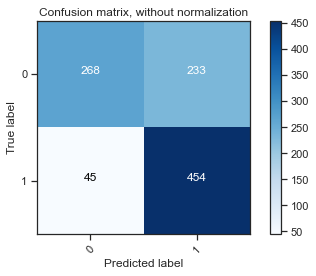

In [24]:
y_test.drop_duplicates()

plot_confusion_matrix(cm, classes=y_test.drop_duplicates(),
                      title='Confusion matrix, without normalization')

1246    0
69      1
Name: state, dtype: int64